In [23]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Exercício 8.29

In [24]:
# parâmetros do problema:
R = 280
C = 10**-4
t = 0.05

In [25]:
def f(L):
    return     math.e**((-R*t)/(2*L))   *  math.cos(  (    1/(L*C) - t*((R/(2*L))**2)         )**0.5    )     -     1/100    

### (a) abordagem gráfica

### Examinando a equação, pode-se afirmar que L deve ser maior do que 10,204, para que o termo no interior da raiz quadrada seja positivo.

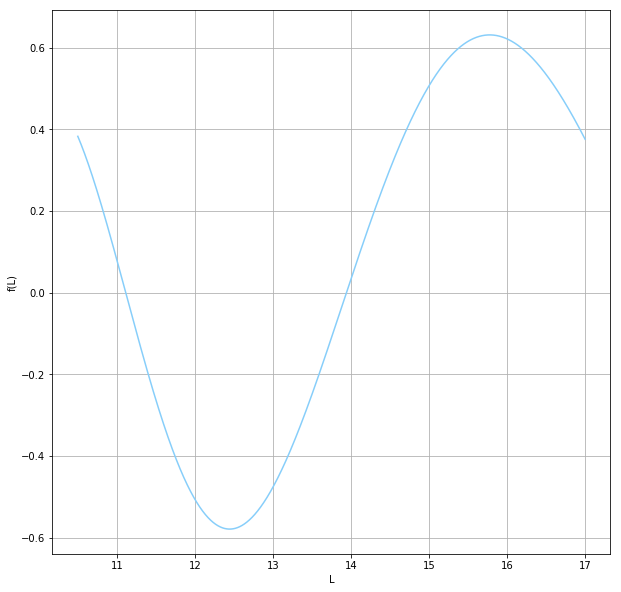

In [26]:
x = [0.0001*i for i in range(105000,170000)]
y = [(math.e**((-R*t)/(2*L)))*(math.cos(((1/(L*C)-(((R)/(2*L))**2)*t))**0.5)) - 1/100 for L in x]

plt.figure(figsize=(10,10))
plt.plot(x,y, color="lightskyblue")
plt.xlabel('L')
plt.ylabel('f(L)')
plt.grid()

### gráfico com menos zoom:

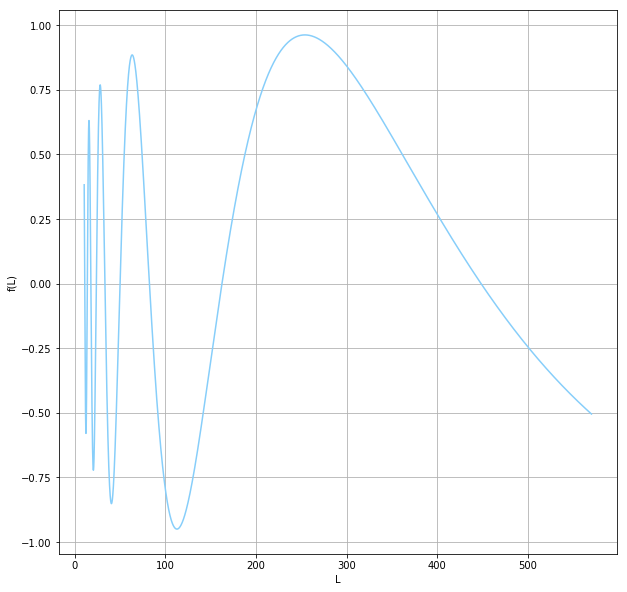

In [27]:
x = [0.001*i for i in range(10500,570000)]
y = [(math.e**((-R*t)/(2*L)))*(math.cos(((1/(L*C)-(((R)/(2*L))**2)*t))**0.5)) - 1/100 for L in x]

plt.figure(figsize=(10,10))
plt.plot(x,y, color="lightskyblue")
plt.xlabel('L')
plt.ylabel('f(L)')
plt.grid()

### Percebe-se que existe mais de um valor que satisfaz à condição, entretanto, será calculado o primeiro deles. De acordo com o primeiro gráfico, este valor é maior que 11, mas está bem próximo de 11.

### (b) método da bissecção

In [28]:
x_lower = 11
x_upper = 12
error = 50
dummy_list = [2,50]
i = 1

while error > 0.0001:
    
    i+=1
    x_root = (x_lower+x_upper)/2
    product =  f(x_lower)* f(x_root)
    if product < 0:
        #the root lies in the lower subinterval
        x_upper = x_root
    if product > 0:
        #the root lies in the upper subinterval
        x_lower = x_root
    if product == 0:
        print(x_root)
        
    dummy_list.append(x_root)
    error = math.fabs(((x_root - dummy_list[i-1])/(x_root))*100)


print(x_lower, x_upper, x_root, error,i)

11.113739013671875 11.113746643066406 11.113746643066406 6.864826755799578e-05 18


### (c) Utilizando o solver do python:

In [29]:
from scipy.optimize import fsolve

### Coloca-se a função a ser resolvida e um chute inicial (evidenciando que o python provavelmente utilizou um método aberto para resolver a equação):

In [30]:
L = fsolve(f, 11)
print(L)

[11.11374083]


### Exercício 8.31

### A partir da equação para a resistividade, subtraindo-se este parâmetro de ambos os lados da equação e substituindo-se todos os parâmetros fornecidos, tem-se uma função f(N), cuja raiz representa a solução procurada.

### Traçando o gráfico para determinar o intervalo no qual deve ser procurada a solução:

In [31]:
# parâmetros do problema:
T0 = 300
T = 1000
u0 = 1.3
q = 1.6*(10**-19)
ni = 6.21*(10**9)
p = 6*(10**6)

u = u0*((T/T0)**-2.42)

In [32]:
def f(N):
    return  (1/(q * u *   0.5*(N+(((N**2)+(4*(ni**2)))**0.5))        )) - p

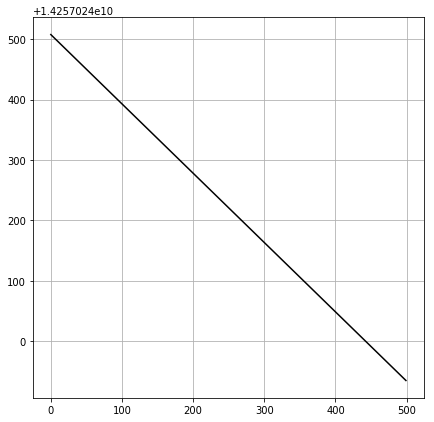

In [33]:
x = [i for i in range(0,500)]
y = [(1/(q * u *   0.5*(N+(((N**2)+(4*(ni**2)))**0.5))        )) - p for N in x]

plt.figure(figsize=(7,7))
plt.plot(x,y, color="black")
plt.grid()

### (a) Método da bissecção:

In [34]:
x_lower = 430
x_upper = 445
error = 50
dummy_list = [2,50]
i = 1

while error > 0.0001:
    
    i+=1
    x_root = (x_lower+x_upper)/2
    product =  f(x_lower)* f(x_root)
    if product < 0:
        #the root lies in the lower subinterval
        x_upper = x_root
    if product > 0:
        #the root lies in the upper subinterval
        x_lower = x_root
    if product == 0:
        print(x_root)
        
    dummy_list.append(x_root)
    error = math.fabs(((x_root - dummy_list[i-1])/(x_root))*100)


print(x_lower, x_upper, x_root, error,i)

444.99977111816406 445 444.99977111816406 5.1434146890094315e-05 17


### (b) Método da secante modificado:

In [35]:
es = 1
x = 0.3
delta = 0.01 #em que o delta é a perturbação
i = 0

while es > 10**(-4):
    xvelho = x
    x = x - ( ( ( 7*((math.sin(x))*(math.e**(-x))) - 1 )*delta )  / ( ( 7*((math.sin(x + delta))*(math.e**(-(x+delta)))) - 1 ) - ( 7*((math.sin(x))*(math.e**(-x))) - 1 ) ) )
    es = math.fabs(100*((x-xvelho)/x))
    i+=1
    
print("Desta forma, a raiz é igual a", x, "e o número de iterações é igual a", i)

Desta forma, a raiz é igual a 0.1701799947565049 e o número de iterações é igual a 5


### Exercício 8.32

### Subtraindo o parâmetro F (força, em N) de ambos os lados da equação, obtém-se uma função f(x), da qual a raiz representa a solução do sistema.

### Traçando o gráfico para determinar o intervalo no qual deve ser procurada a solução:

In [36]:
# parâmetros do problema:
e0 = 8.85*(10**-12)
q = 2*(10**-5)
Q = 2*(10**-5)
a = 0.9
F = 1

In [37]:
def f(x):
    return  (     ((1/(4*math.pi*e0))*(q*Q*x)) / ((x**2 + a**2)**1.5)         ) - F

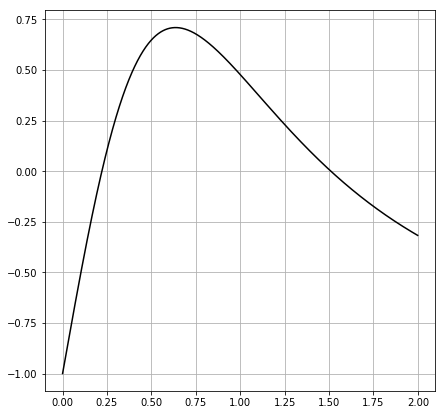

In [38]:
x2 = [0.001*i for i in range(2000)]
y = [ (  ((1/(4*math.pi*e0))*(q*Q*x)) / ((x**2 + a**2)**1.5)          - F   ) for x in x2]

plt.figure(figsize=(7,7))
plt.plot(x2,y, color="black")
plt.grid()

### Estas raízes serão obtida aplicando-se o método da bissecção.

In [39]:
x_lower = 0
x_upper = 1
error = 50
dummy_list = [2,50]
i = 1

while error > 0.0001:
    i+=1
    x_root = (x_lower+x_upper)/2
    product =  f(x_lower)* f(x_root)
    if product < 0:
        #the root lies in the lower subinterval
        x_upper = x_root
    if product > 0:
        #the root lies in the upper subinterval
        x_lower = x_root
    if product == 0:
        print(x_root)
    dummy_list.append(x_root)
    error = math.fabs(((x_root - dummy_list[i-1])/(x_root))*100)
velocidade = f(x_root) + 5

print(x_lower, x_upper, x_root, error,i,velocidade)

0.2213500738143921 0.22135019302368164 0.2213500738143921 5.385554542472906e-05 24 4.999999828060086


In [40]:
x_lower = 1
x_upper = 2
error = 50
dummy_list = [2,50]
i = 1

while error > 0.0001:
    i+=1
    x_root = (x_lower+x_upper)/2
    product =  f(x_lower)* f(x_root)
    if product < 0:
        #the root lies in the lower subinterval
        x_upper = x_root
    if product > 0:
        #the root lies in the upper subinterval
        x_lower = x_root
    if product == 0:
        print(x_root)
    dummy_list.append(x_root)
    error = math.fabs(((x_root - dummy_list[i-1])/(x_root))*100)
velocidade = f(x_root) + 5

print(x_lower, x_upper, x_root, error,i,velocidade)

1.5097846984863281 1.5097856521606445 1.5097856521606445 6.316620607974733e-05 21 4.9999995889255


### Para conferir, é calculado o valor da força nas duas raízes, obtendo-se a força procurada, de 1N:

In [41]:
x = 0.2213500738143921

In [42]:
print( ((1/(4*math.pi*e0))*(q*Q*x)) / ((x**2 + a**2)**1.5)     )

0.9999998280600861


In [43]:
x = 1.5097846984863281

In [44]:
print( ((1/(4*math.pi*e0))*(q*Q*x)) / ((x**2 + a**2)**1.5)     )

1.0000003554176637
